In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from functools import reduce
from collections import Counter
from nltk.corpus import stopwords as sw
from nltk.util import ngrams

In [2]:
# Grab and process the raw data.
review_names = ['yelp_labelled','amazon_cells_labelled','imdb_labelled']
colnames = ['sentence', 'sentiment']

sentimentlist = []

for review_name in review_names:
    path = "../data/sentiment/" + review_name + ".txt"
    tempdf = pd.read_csv(path,  delimiter= '\t', names=colnames)
    tempname = review_name
    
    # adds location of data to the dataframe
    tempdf['location'] = tempname
    sentimentlist.append(tempdf)

sentiment = pd.concat(sentimentlist)
colnames = ['sentence', 'sentiment']

pos = sentiment['sentence'].loc[sentiment['sentiment'] == 1]
neg = sentiment['sentence'].loc[sentiment['sentiment'] == 0]

# sentiment['len'] = sentiment.sentence.apply(len(value))
sentiment['len'] = sentiment.sentence.apply(len)

In [3]:
# create set of stop words from nltk corpus
def bigram(value):
    tokens = nltk.word_tokenize(value)
    bigrm = list(nltk.bigrams(tokens))
    bigramlist = []
    
    for bigram in bigrm:
        bigramlist.append(' '.join(bigram))
        
    return bigramlist
    
badbigrams = Counter(reduce((lambda x, y: x + y), neg.str.lower().apply(bigram))).most_common(100)[35:]
goodbigrams = Counter(reduce((lambda x, y: x + y), pos.str.lower().apply(bigram))).most_common(100)[35:]

In [4]:
stop_words = set(sw.words('english'))
    
goodset = Counter(reduce((lambda x, y: x + y), pos.str.lower().apply(nltk.word_tokenize))).most_common(425)
badset = Counter(reduce((lambda x, y: x + y), neg.str.lower().apply(nltk.word_tokenize))).most_common(425)

In [5]:
goodwords = []
badwords = []
goodbgs = []
badbgs = []

for good in goodset:
    goodwords.append(good[0])
    
for bad in badset:
    badwords.append(bad[0])
    
for good in goodbigrams:
    goodbgs.append(good[0])
    
for bad in badbigrams:
    badbgs.append(bad[0])

# use filter / generator (add set for logn vs iterating)
    
gooduniquewords = [item for item in goodwords if item not in badwords]
baduniquewords = [item for item in badwords if item not in goodwords]
badbigramsunique = [item for item in badbgs if item not in goodbgs]
goodbigramsunique = [item for item in goodbgs if item not in badbgs]

In [6]:
gooduniquewords = [item for item in gooduniquewords if item not in stop_words]
baduniquewords = [item for item in baduniquewords if item not in stop_words]

In [7]:
print(badbigramsunique)
print(goodbigramsunique)
print(gooduniquewords)
print(baduniquewords)

['the food', 'and it', '0 the', 'i do', 'bad .', "does n't", 'is not', 'there is', 'one of', 'the film', 'did not', "was n't", 'out of', '1 i', 'back .', 'do not', 'piece of', 'at all', 'to get', "ca n't", 'would not', 'was not', 'the service', "wo n't", 'waste your', 'this one', 'in my', 'a good', 'there was', 'a few', 'but the', 'the most', 'does not', 'the acting', 'was the', 'this was', 'again .', 'the first', 'waste of', 'that the', 'this product', 'that it', 'the only', 'was very', 'time .']
[', it', 'great .', 'well .', 'this film', 'if you', 'is very', 'phone .', "i 'm", 'i was', "do n't", '. 1', 'was a', 'with a', 'all the', 'the price', 'is great', 'i think', 'works great', 'to be', ') .', 'recommend this', 'like a', 'of this', 'the sound', 'it has', 'a very', 'film .', 'place .', 'a lot', ', which', 'it !', 'love the', 'in this', 'have been', ', a', 'i really', 'of a', 'has a', "'s a", 'to use', 'movie is', 'was so', 'you can', 'place is', 'love this']
['nice', 'works', 'exc

In [8]:
def wordc(value):
    value = value.lower()
    print(value)
    valuecount = 0
    for key in baduniquewords:
        if key in value:
            valuecount = valuecount - value.count(key)
    for key in gooduniquewords:
        if key in value:
            valuecount = valuecount + value.count(key)
    for key in badbigramsunique:
        if key in value:
            valuecount = valuecount - value.count(key)
    for key in goodbigramsunique:
        if key in value:
            valuecount = valuecount + value.count(key)
    
    return valuecount
        

In [9]:
sentiment['valuecount'] = sentiment.sentence.apply(wordc)

wow... loved this place.
crust is not good.
not tasty and the texture was just nasty.
stopped by during the late may bank holiday off rick steve recommendation and loved it.
the selection on the menu was great and so were the prices.
now i am getting angry and i want my damn pho.
honeslty it didn't taste that fresh.)
the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
the fries were great too.
a great touch.
service was very prompt.
would not go back.
the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced.
i tried the cape cod ravoli, chicken,with cranberry...mmmm!
i was disgusted because i was pretty sure that was human hair.
i was shocked because no signs indicate cash only.
highly recommended.
waitress was a little slow in service.
this place is not worth your time, let alone vegas.
did not like at all.
the burrittos blah!
the food, amazing.
service is also cute.
i could care less

very displeased.
i might have gotten a defect, but i would not risk buying it again because of the built quality alone.
they made this case too small and is very difficult to install.
restored my phone to like new performance.
i would recommend purchasing the jabra jx-10 series 2 which works flawlessly with my moto q, go figure.
i searched the internet, and found this one to be the best value.
does not fit.
very happy with this product.
the screen size is big, key pad lit well enough, and the camera quality is excellent for a camera phone.
there's really nothing bad i can say about this headset.
i'm glad i found this product on amazon it is hard to find, it wasn't high priced.
portable and it works.
my colleague & i now get great reception.a little expensive, but performance is great.
i even fully charged it before i went to bed and turned off blue tooth and wi-fi and noticed that it only had 20 % left in the morning.
i've also had problems with the phone reading the memory card in whi

nevertheless yet another wonderful film from the great master's stable.  
i have to say that this film was excellently produced and tops the ratings as a typical sci fi film!  
excellently produced by one of sci-fi's best producers scot vandiver !  
but it is entertaining, nonetheless.  
it's a campy sort of film that's a joy to watch.  
there's barely a boring moment in the film and there are plenty of humorous parts.  
the cast is always entertaining as usual.  
overall, a delight!  
this movie is so mind-bendingly awful, it couldn't have even been created.  
the film lacks any real scares or tension & some of the medical terminology used throughout is a bit iffy to say the least & i say that as an insulin dependant diabetic myself.  
the least said about the acting the better.  
this movie does an excellent job of revealing the complexity of the task and the incredible challenges facing south africa.  
i believe every one should see this movie as i think few people outside of south 

In [10]:
sentiment.valuecount

0      2
1     -1
2      1
3      1
4      5
5     -1
6      1
7     -1
8      0
9      0
10    -1
11    -1
12     0
13     1
14     1
15     1
16     2
17    -1
18    -1
19    -1
20     0
21     1
22     0
23     1
24     0
25    -1
26     0
27     3
28    -4
29    -2
      ..
718    2
719    2
720    2
721   -2
722   -2
723    4
724    3
725    0
726    0
727    2
728    6
729    0
730    1
731    1
732    0
733    0
734    0
735    3
736    2
737   -2
738    1
739    0
740    0
741    2
742    1
743    0
744    1
745    1
746    0
747   -3
Name: valuecount, Length: 2748, dtype: int64

In [11]:
# making long list of features
for key in baduniquewords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    
    sentiment[str(key)] = sentiment.sentence.str.lower().str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

for key in gooduniquewords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    
    sentiment[str(key)] = sentiment.sentence.str.lower().str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in badbigramsunique:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    
    sentiment[str(key)] = sentiment.sentence.str.lower().str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in goodbigramsunique:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    try:
        sentiment[str(key)] = sentiment.sentence.str.lower().str.contains(
            str(key),
            case=False
        )
    
    # handles regex search error and removes faulty key
    except:
        print(key)
        goodbigramsunique.remove(key)
        continue

) .


In [12]:
list(sentiment.columns)

['sentence',
 'sentiment',
 'location',
 'len',
 'valuecount',
 'worst',
 'waste',
 'money',
 'terrible',
 'minutes',
 'poor',
 'nothing',
 'plot',
 'awful',
 'horrible',
 'slow',
 '$',
 'totally',
 'stupid',
 'old',
 'show',
 'buy',
 'talk',
 'cheap',
 'hard',
 'bland',
 'bit',
 'avoid',
 'line',
 'disappointing',
 'kind',
 'unfortunately',
 'worse',
 'anything',
 'problem',
 'calls',
 'sure',
 'took',
 'customer',
 'wait',
 'return',
 'mediocre',
 'sucked',
 'simply',
 'completely',
 'charge',
 'hear',
 'least',
 'coming',
 'extremely',
 'waited',
 'flavor',
 'felt',
 'either',
 'almost',
 'hours',
 'writing',
 'disappointment',
 'low',
 'started',
 'wasted',
 'plug',
 'crap',
 '3',
 'none',
 'picture',
 'expect',
 'barely',
 'looks',
 'three',
 'dialogue',
 'getting',
 'let',
 'hour',
 'guess',
 'rude',
 'watched',
 'burger',
 'soon',
 'cold',
 'may',
 'hate',
 'stay',
 'else',
 'rather',
 'average',
 'easily',
 'call',
 'understand',
 'volume',
 'design',
 'broke',
 'put',
 'unit',

In [13]:
sentiment['sentiment'] = (sentiment['sentiment'] == 1)
sentiment.sentiment.value_counts()

True     1386
False    1362
Name: sentiment, dtype: int64

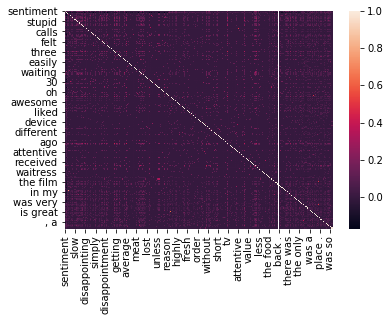

In [14]:
sns.heatmap(sentiment.corr())

In [15]:
data = sentiment.iloc[:, 3:]
# data = sentiment['valuecount']
target = sentiment['sentiment']

In [16]:
sentiment.head()

,sentence,sentiment,location,len,valuecount,worst,waste,money,terrible,minutes,...,i really,of a,has a,'s a,to use,movie is,was so,you can,place is,love this
0,Wow... Loved this place.,True,False,24,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,18,-1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,41,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,87,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,59,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}, {}%".format(
    data.shape[0],
    (target != y_pred).sum(),
    ((target != y_pred).sum()/data.shape[0]*100)
))

Number of mislabeled points out of a total 2748 points : 642, 23.362445414847162%


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[1112,  250],
       [ 392,  994]])

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(target,y_pred))

             precision    recall  f1-score   support

      False       0.74      0.82      0.78      1362
       True       0.80      0.72      0.76      1386

avg / total       0.77      0.77      0.77      2748



In [21]:
.69*1362

939.78

In [22]:
.76*2748


2088.48

In [23]:
# when target != y_pred
# disambiguator